# Exploratory Data Analysis

## [Students' Academic Performance Dataset](https://www.kaggle.com/aljarah/xAPI-Edu-Data/home)

### - xAPI-Educational Mining Dataset
### Author: Ho Seok (Brandon) Oh

> This dataset is downloaded from the [Kaggle](https://www.kaggle.com/) platform.


#### Table of contents
1. Introduction
   - 1-1. About Dataset
   - 1-2. Explore Dataset
2. Data Analysis
   - 2-1. Categorical features
   - 2-2. Numerical features
3. Prediction
   - 3-1. Preprocessing Dataset
   - 3-2. Machine Learning using Random Forest Classifier
   - 3-3. Machine Learning using XGBoost Classifier

## 1. Introduction


### 1-1. About Dataset

#### Attributes

1. **gender**: student's gender (nominal: 'Male' or 'Female’)
2. **NationalITy**: student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)
3. **PlaceofBirth**: student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)
4. **StageID**: educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)
5. **GradeID**: grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

6. **SectionID**: classroom student belongs (nominal:’A’,’B’,’C’)

7. **Topic**: course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

8. **Semester**: school year semester (nominal:’ First’,’ Second’)

9. **Relation**: parent responsible for student (nominal:’mom’,’father’)

10. **raisedhands**: how many times the student raises his/her hand on classroom (numeric:0-100)

11. **VisITedResources**: how many times the student visits a course content(numeric:0-100)

12. **AnnouncementsView**: how many times the student checks the new announcements(numeric:0-100)

13. **Discussion**: how many times the student participate on discussion groups (numeric:0-100)

14. **ParentAnsweringSurvey**: parent answered the surveys which are provided from school or not (nominal:’Yes’,’No’)

15. **ParentschoolSatisfaction**: the Degree of parent satisfaction from school(nominal:’Yes’,’No’)

16. **StudentAbsenceDays**: the number of absence days for each student (nominal: above-7, under-7)


#### The students are classified into three numerical intervals based on their total grade/mark:

- **Low**: interval includes values from 0 to 69
- **Middle**: interval includes values from 70 to 89
- **High**: interval includes values from 90-100


The features of the dataset are classified into three major features below:

- **Demographic features**: gender, NationalITy, PlaceofBirth, Relation
- **Academic background features**: StageID, GradeID, SectionID, Topic, Semester, Class
- **Behavioral features**: raisedhands, VisITedResources, AnnouncementsView, Discussion, ParentAnsweringSurvey, ParentschoolSatisfaction, StudentAbsenceDays

Also, I can divide it into two types of features:
1. **Categorical features**: gender, NationalITy, PlaceofBirth, Relation, StageID, GradeID, SectionID, Topic, Semester, ParentAnsweringSurvey, ParentschoolSatisfaction, StudentAbsenceDays, Class
2. **Numerical features**: raisedhands, VisITedResources, AnnouncementsView, Discussion

In [75]:
# Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots

#### Helper functions

In [39]:
# Display image
def display(img):
    #plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### 1-2. Explore Dataset

In [40]:
# read data
data_df = pd.read_csv('./data/xAPI-Edu-Data.csv')

In [41]:
# information of dataset

rows, cols = data_df.shape
print("Number of students: ", rows)
print("Number of attributes: ", cols)
print("")
print("List of attributes:")
print(data_df.columns.values)

Number of students:  480
Number of attributes:  17

List of attributes:
['gender' 'NationalITy' 'PlaceofBirth' 'StageID' 'GradeID' 'SectionID'
 'Topic' 'Semester' 'Relation' 'raisedhands' 'VisITedResources'
 'AnnouncementsView' 'Discussion' 'ParentAnsweringSurvey'
 'ParentschoolSatisfaction' 'StudentAbsenceDays' 'Class']


In [42]:
# Rename four column headers
data_df.rename(index=str, columns={
    "gender": "Gender", 
    "NationalITy":"Nationality", 
    "PlaceofBirth":"PlaceOfBirth", 
    "raisedhands": "RaisedHands", 
    "VisITedResources": "VisitedResources"}, inplace=True)

In [43]:
# Check if missing values exist or not
data_df.isnull().sum()

Gender                      0
Nationality                 0
PlaceOfBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
RaisedHands                 0
VisitedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

> **Observation**: I don't need to worry about missing values in the dataset.

In [44]:
# Display the first five students
data_df.head()

,Gender,Nationality,PlaceOfBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


## 2. Data Analysis

### 2-1. Categorical features

Let's take a look at categorical data first!

#### - Gender

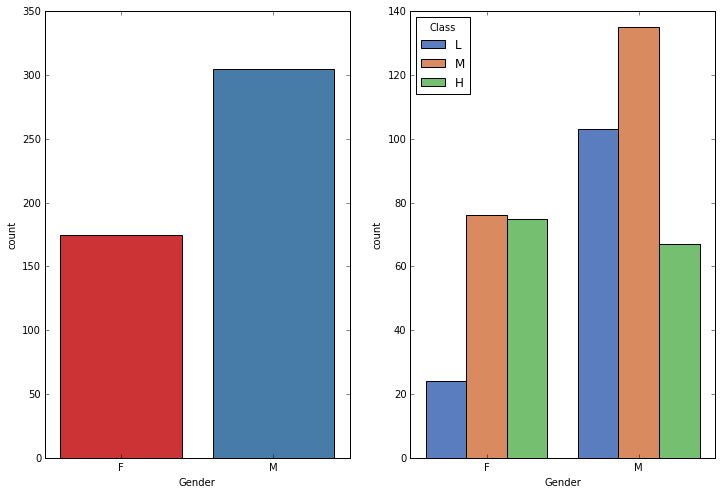

In [45]:
plt.subplot(1,2,1)
sns.countplot(x="Gender", order=['F','M'], data=data_df, palette="Set1")

plt.subplot(1,2,2)
sns.countplot(x="Gender", order=['F','M'], hue="Class", hue_order=['L','M','H'], data=data_df, palette="muted")

plt.show()

> **Observation**: Boy students are larger than girls. Female students who get high grades (H) are a bit bigger than male one, and male students who get middle or low grades are larger than female one.

#### - Nationality and PlaceOfBirth

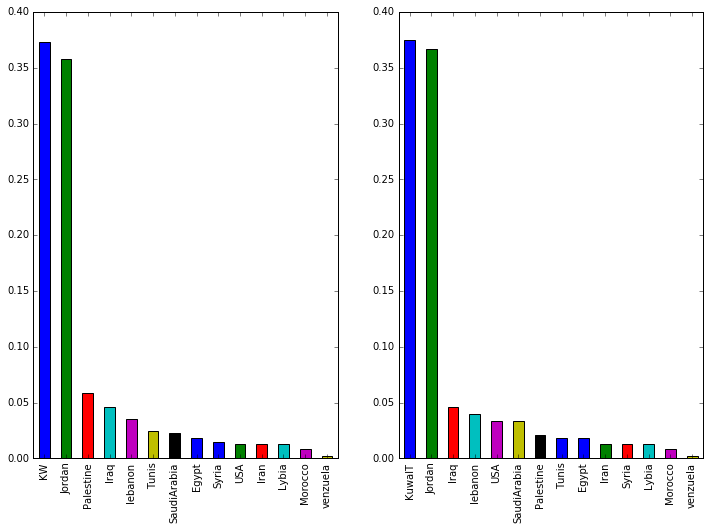

In [46]:
plt.subplot(1,2,1)
data_df['Nationality'].value_counts(normalize=True).plot(kind='bar')

plt.subplot(1,2,2)
data_df['PlaceOfBirth'].value_counts(normalize=True).plot(kind='bar')

plt.show()

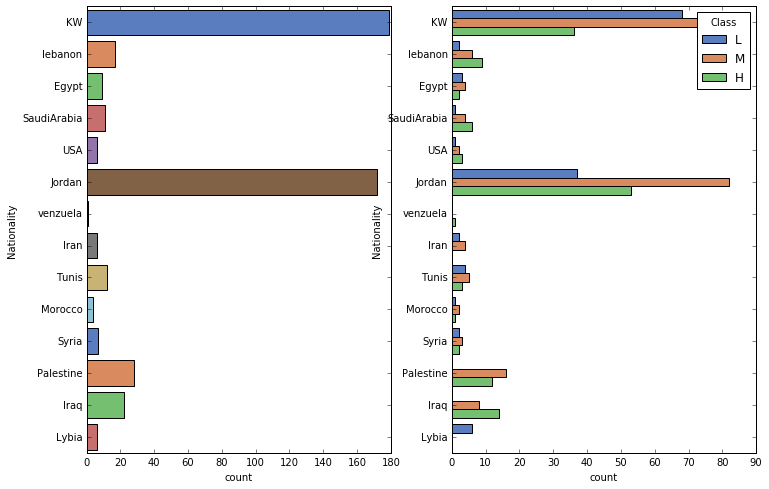

In [47]:
plt.subplot(1,2,1)
sns.countplot(y="Nationality", data=data_df, palette="muted")

plt.subplot(1,2,2)
sns.countplot(y="Nationality", hue="Class", hue_order=['L','M','H'], data=data_df, palette="muted")

plt.show()

> **Observation**: Most of students (over 70%) are originally from Kuwait and Jordan, and there are few immigrant students in school. So I can ignore the *PlaceOfBirth* feature because the plot looks very similar. Also, the students who come from Jordan get more higher grades than others.

#### - Relation

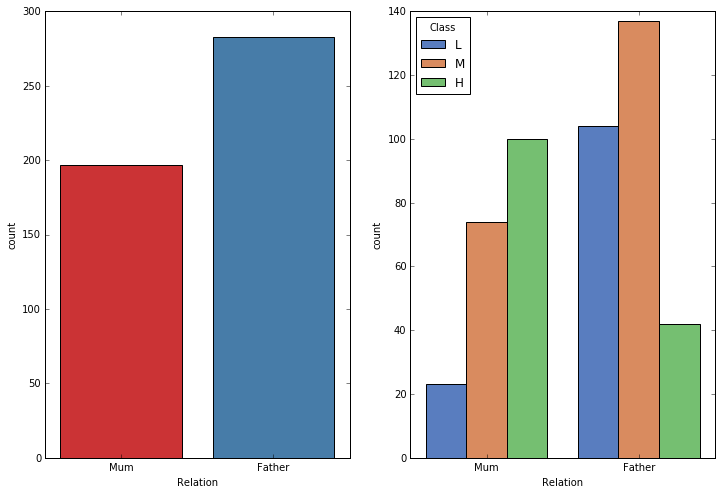

In [48]:
plt.subplot(1,2,1)
sns.countplot(x="Relation", order=['Mum','Father'], data=data_df, palette="Set1")

plt.subplot(1,2,2)
sns.countplot(x="Relation", order=['Mum','Father'], hue="Class", hue_order=['L','M','H'], data=data_df, palette="muted")

plt.show()

> **Observation**: Fathers is more responsible for taking care of students than mothers, but the students who are raised by mothers are getting better at studying.

#### - StageID and GradeID

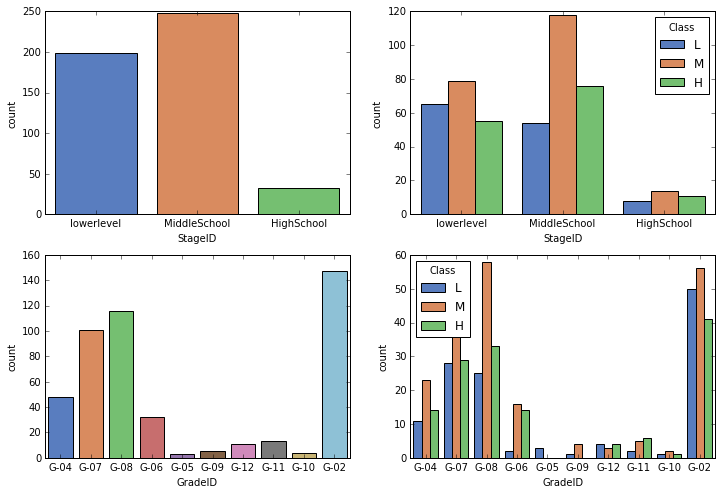

In [49]:
plt.subplot(2,2,1)
sns.countplot(x="StageID", data=data_df, palette="muted")

plt.subplot(2,2,2)
sns.countplot(x="StageID", hue="Class", hue_order=['L','M','H'], data=data_df, palette="muted")

plt.subplot(2,2,3)
sns.countplot(x="GradeID", data=data_df, palette="muted")

plt.subplot(2,2,4)
sns.countplot(x="GradeID", hue="Class", hue_order=['L','M','H'], data=data_df, palette="muted")


plt.show()

> **Observation**: Most of students are in Elementary and Middle Schools, and students are not evenly distributed in school.

#### - SectionID

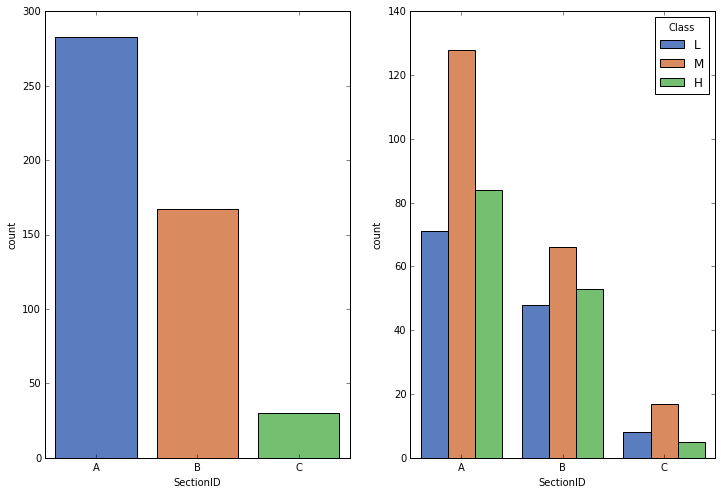

In [50]:
plt.subplot(1,2,1)
sns.countplot(x="SectionID", order=['A','B','C'], data=data_df, palette="muted")

plt.subplot(1,2,2)
sns.countplot(x="SectionID", order=['A','B','C'], hue="Class", hue_order=['L','M','H'], data=data_df, palette="muted")

plt.show()

> **Observation**: There are more students who in a classroom 'A'.

#### - Topic

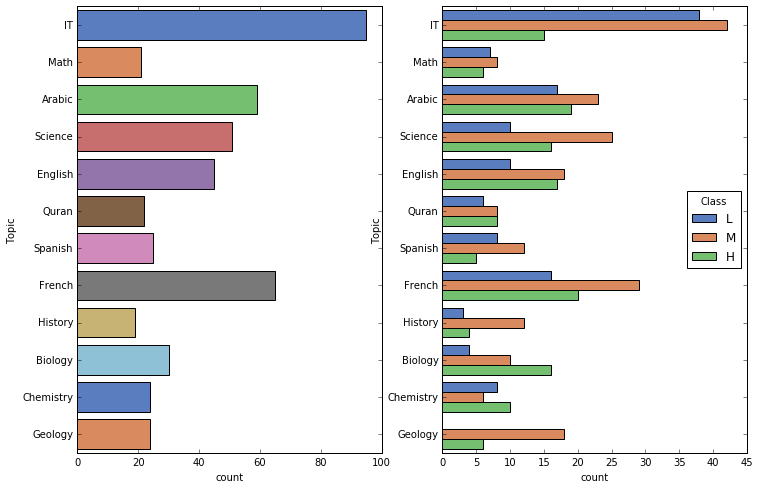

In [51]:
plt.subplot(1,2,1)
sns.countplot(y="Topic", data=data_df, palette="muted")

plt.subplot(1,2,2)
sns.countplot(y="Topic", hue="Class", hue_order=['L','M','H'], data=data_df, palette="muted")

plt.show()

In [52]:
print("Percentage of topic")
data_df['Topic'].value_counts(normalize=True)

Percentage of topic


IT           0.197917
French       0.135417
Arabic       0.122917
Science      0.106250
English      0.093750
Biology      0.062500
Spanish      0.052083
Chemistry    0.050000
Geology      0.050000
Quran        0.045833
Math         0.043750
History      0.039583
Name: Topic, dtype: float64

> **Observation**: Many stduents are interested in IT and Science (e.g., Biology, Chemistry), as well as Language (e.g., French, Arabic, English). On the other hand, few students like Math and History. Also, the students who is taking language lectrues are relatively getting better grades, but some stduents are having a hard time in IT class. As a note, no students who are taking Geology get low grades.

#### - Semester

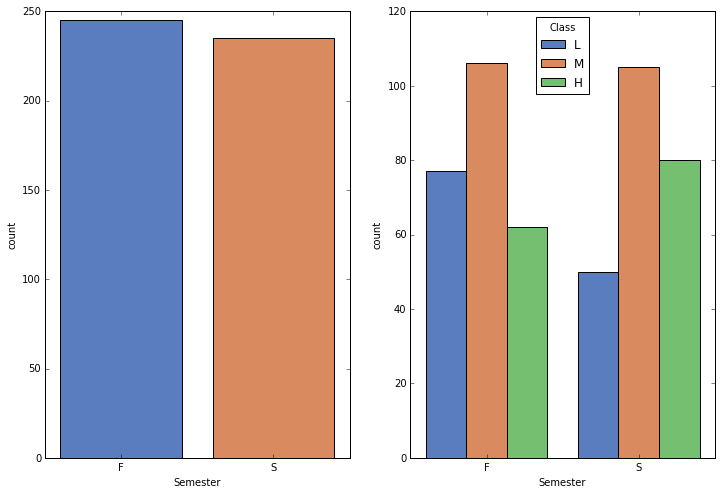

In [53]:
plt.subplot(1,2,1)
sns.countplot(x="Semester", order=['F','S'], data=data_df, palette="muted")

plt.subplot(1,2,2)
sns.countplot(x="Semester", order=['F','S'], hue="Class", hue_order=['L','M','H'], data=data_df, palette="muted")

plt.show()

> **Observation**: Students are evenly distributed in two semesters, but the students who are in the 2nd semester are getting higher grades.

#### - ParentAnsweringSurvey

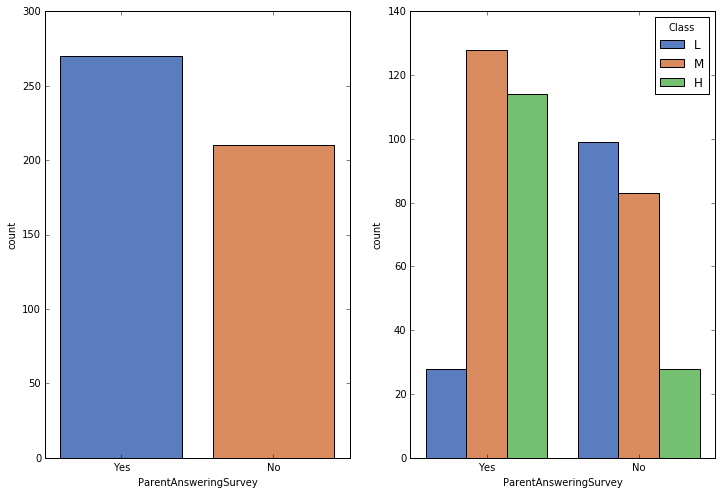

In [54]:
plt.subplot(1,2,1)
sns.countplot(x="ParentAnsweringSurvey", data=data_df, palette="muted")

plt.subplot(1,2,2)
sns.countplot(x="ParentAnsweringSurvey", hue="Class", hue_order=['L','M','H'], data=data_df, palette="muted")

plt.show()

> **Observation**: The parents who answer surveys are a bit bigger, and their children are getting better grades.

#### - ParentschoolSatisfaction

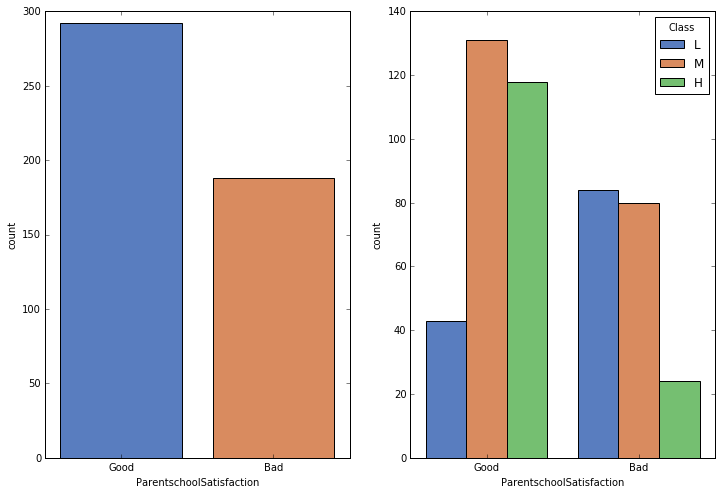

In [55]:
plt.subplot(1,2,1)
sns.countplot(x="ParentschoolSatisfaction", data=data_df, palette="muted")

plt.subplot(1,2,2)
sns.countplot(x="ParentschoolSatisfaction", hue="Class", hue_order=['L','M','H'], data=data_df, palette="muted")

plt.show()

> **Observation**: There are more parents who are satisfied with the school, and their students are getting better at studying.

#### - StudentAbsenceDays

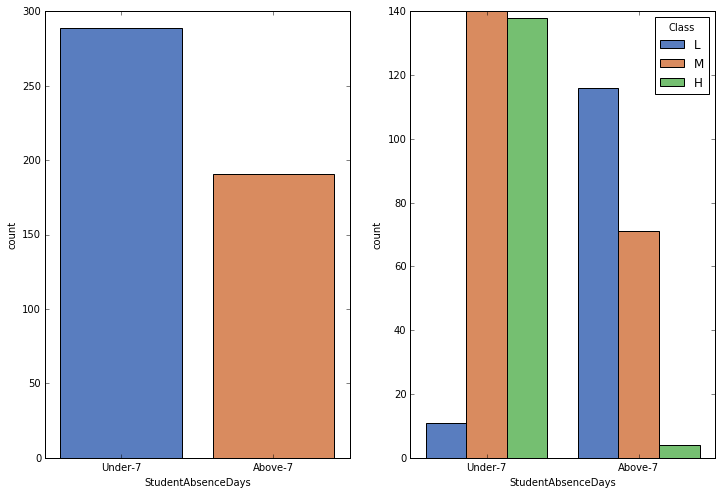

In [56]:
plt.subplot(1,2,1)
sns.countplot(x="StudentAbsenceDays", data=data_df, palette="muted")

plt.subplot(1,2,2)
sns.countplot(x="StudentAbsenceDays", hue="Class", hue_order=['L','M','H'], data=data_df, palette="muted")

plt.show()

> **Observation**: The students who have less than 7 absence days are larger, and they have way better grades than others.

**Summary of students with better grades**:
- The students who are from Jordan
- The students who take care of their mother
- The students who take the 2nd semester
- The students who take Language lectures
- The students with parents who are interested in school
- The students who have less than 7 absence days

## 2-2. Numerical features

In [57]:
data_df.describe()

,RaisedHands,VisitedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


> **Observation**: Students have more visits in a course content.

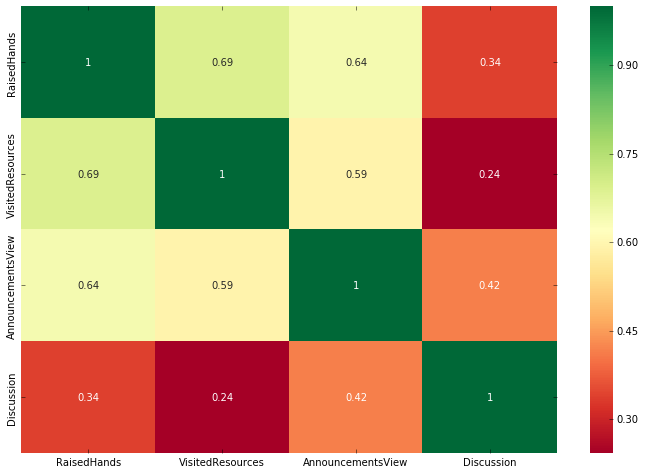

In [58]:
correlation = data_df.corr(method='pearson')
sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")

> **Observation**: All the features have positive correlations except for Discussion.

#### - RaisedHands

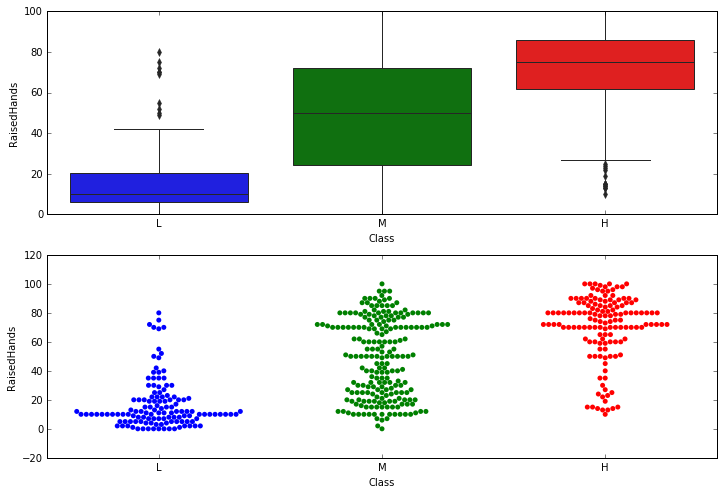

In [59]:
plt.subplot(2,1,1)
sns.boxplot(x="Class", order=['L','M','H'], y="RaisedHands", data=data_df)

plt.subplot(2,1,2)
sns.swarmplot(x="Class", order=['L','M','H'], y="RaisedHands", data=data_df)

plt.show()

> **Observation**: Students in the High level raised more their hands.

#### - VisitedResources

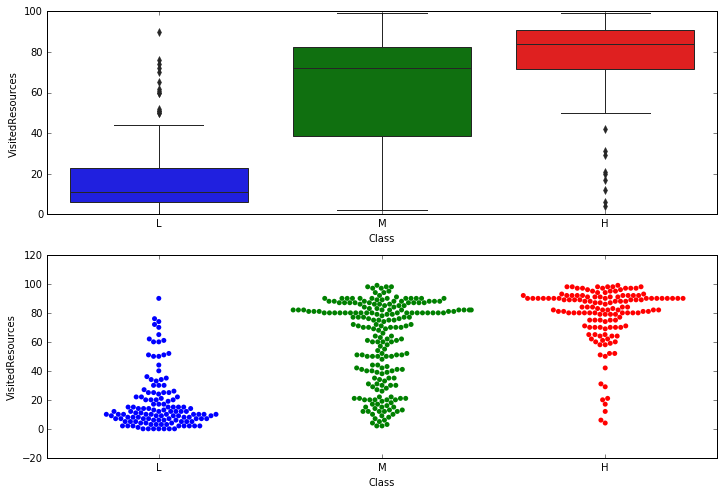

In [60]:
plt.subplot(2,1,1)
sns.boxplot(x="Class", order=['L','M','H'], y="VisitedResources", data=data_df)

plt.subplot(2,1,2)
sns.swarmplot(x="Class", order=['L','M','H'], y="VisitedResources", data=data_df)

plt.show()

> **Observation**: Students in the High level visited resources more than others.

#### - AnnouncementsView

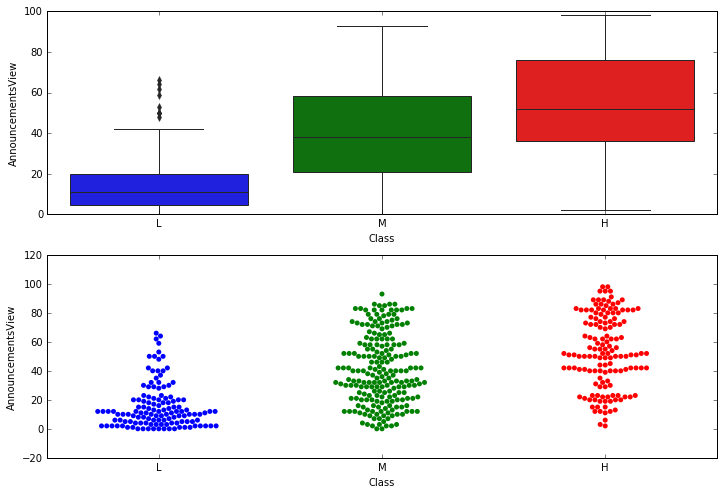

In [61]:
plt.subplot(2,1,1)
sns.boxplot(x="Class", order=['L','M','H'], y="AnnouncementsView", data=data_df)

plt.subplot(2,1,2)
sns.swarmplot(x="Class", order=['L','M','H'], y="AnnouncementsView", data=data_df)

plt.show()

> **Observation**: Students in the High level viewed announcements more than others.

#### - Discussion

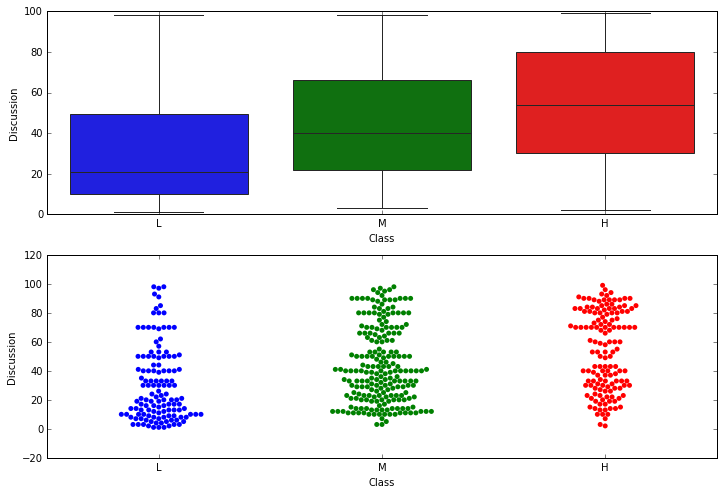

In [62]:
plt.subplot(2,1,1)
sns.boxplot(x="Class", order=['L','M','H'], y="Discussion", data=data_df)

plt.subplot(2,1,2)
sns.swarmplot(x="Class", order=['L','M','H'], y="Discussion", data=data_df)

plt.show()

> **Observation**: Students in the High level participated in discussion.

## 3. Prediction

In [64]:
# import
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

le = LabelEncoder()

### 3-1. Preprocessing Dataset

In [65]:
dataset = data_df.copy()

# Transform labels to integers
for header in dataset.columns.values:
    if dataset[header].dtype == 'object':
        dataset[header] = le.fit_transform(dataset[header])


In [66]:
# Display the first five rows
dataset.head()

,Gender,Nationality,PlaceOfBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


In [67]:
# Dataset is divided into features and a target
features = dataset.drop('Class', axis=1)
target = dataset['Class']

print("features:", features.shape)
print("target:", target.shape)

features: (480, 16)
target: (480,)


In [68]:
# Split features into training and testing data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Traing features: ", X_train.shape, "Training target", y_train.shape)
print("Testing features: ", X_test.shape, "Testing target", y_test.shape)

Traing features:  (384, 16) Training target (384,)
Testing features:  (96, 16) Testing target (96,)


### 3-2. Machine Learning using Random Forest Classifier

In [69]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [70]:
rfc_prediction = rfc_model.predict(X_test)
rfc_score = accuracy_score(y_test, rfc_prediction)
rfc_report = classification_report(y_test, rfc_prediction)

print("Score: ", rfc_score)
print("Report: ", rfc_report)

Score:  0.770833333333
Report:               precision    recall  f1-score   support

          0       0.68      0.86      0.76        22
          1       0.77      0.88      0.82        26
          2       0.84      0.67      0.74        48

avg / total       0.78      0.77      0.77        96



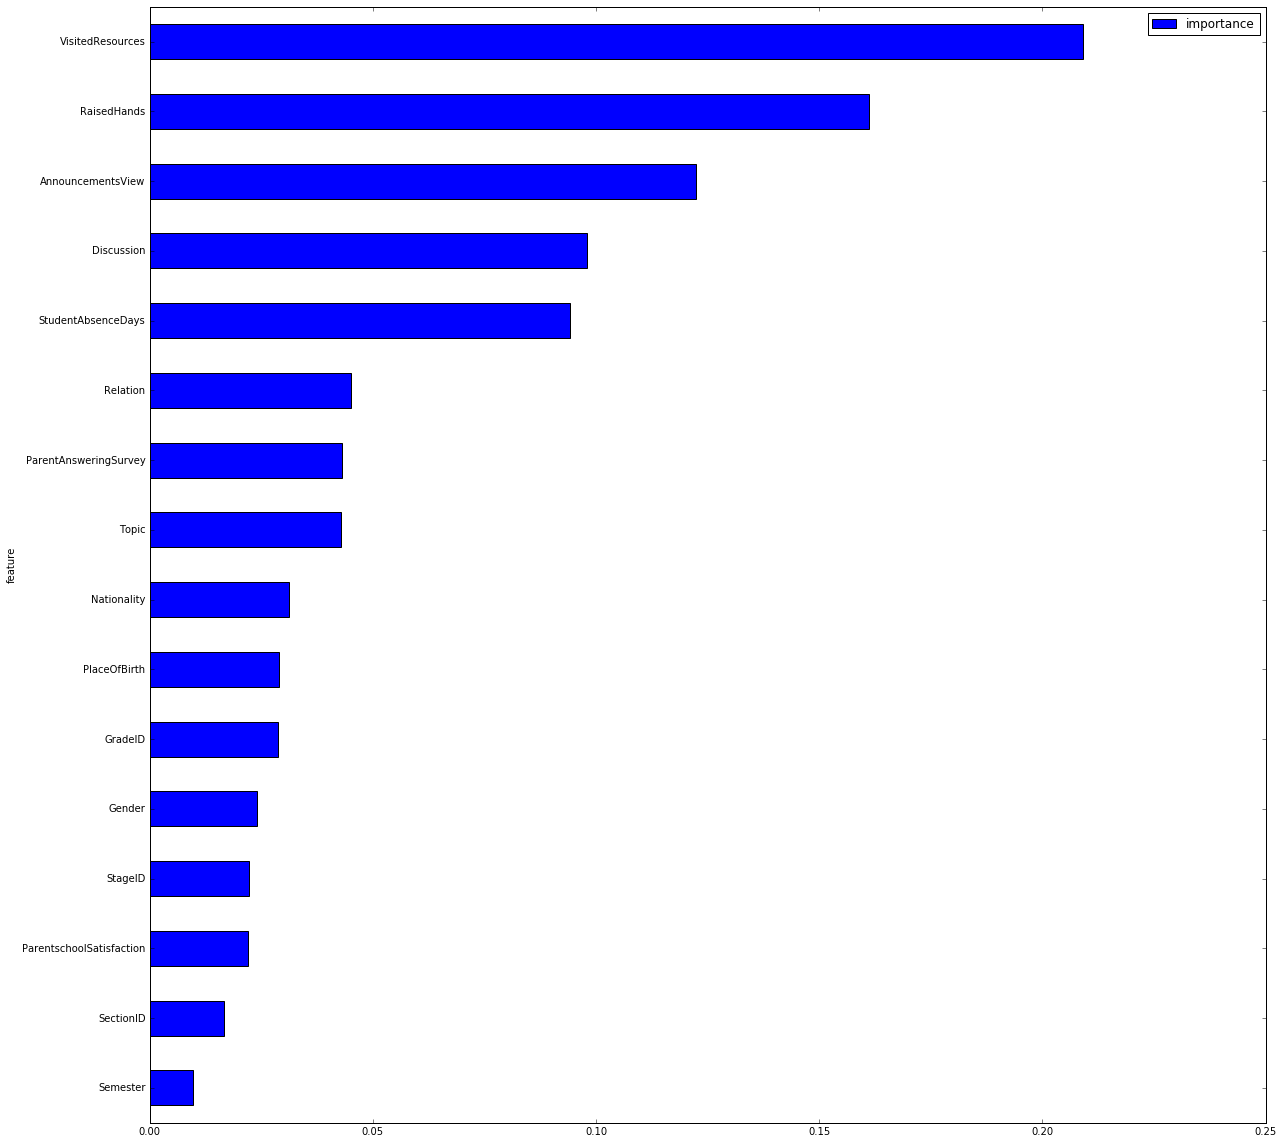

In [71]:
rfc_features = pd.DataFrame()
rfc_features['feature'] = X_train.columns
rfc_features['importance'] = rfc_model.feature_importances_
rfc_features.sort_values(by=['importance'], ascending=True, inplace=True)
rfc_features.set_index('feature', inplace=True)

rfc_features.plot(kind='barh', figsize=(20, 20))

> **Overvation**: Four behaviour features are more important to succeed in school.

### 3-3. Machine Learning using XGBoost Classifier

In [72]:
xgb_model = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100, seed=10)
xgb_model.fit(X_train, y_train)
xgb_prediction = xgb_model.predict(X_test)

In [73]:
xgb_score = accuracy_score(y_test, xgb_prediction)
xgb_report = classification_report(y_test, xgb_prediction)

print("Score: ", xgb_score)
print("Report: ", xgb_report)

Score:  0.802083333333
Report:               precision    recall  f1-score   support

          0       0.77      0.77      0.77        22
          1       0.79      0.88      0.84        26
          2       0.82      0.77      0.80        48

avg / total       0.80      0.80      0.80        96



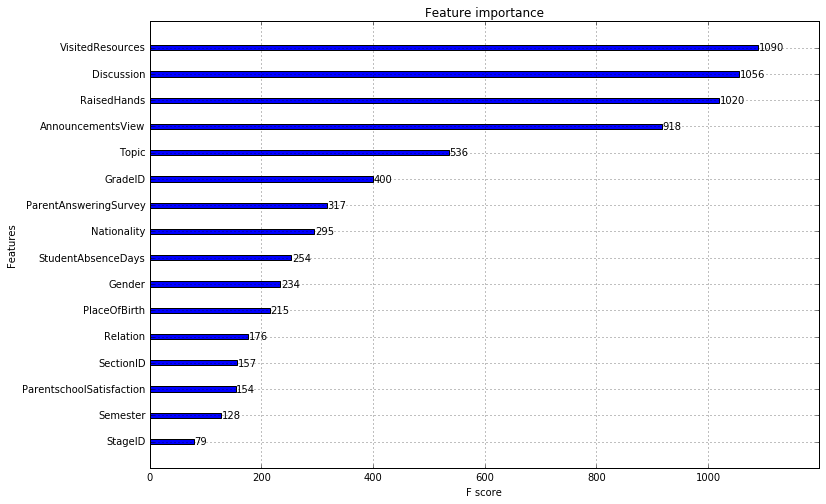

In [74]:
plot_importance(xgb_model)

> **Overvation**: Four behaviour features are more important to succeed in school.